# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, PowerTransformer, StandardScaler
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

import warnings
warnings.filterwarnings("ignore")

from drive.MyDrive.Kaggle.Clustering_072022.src.functions import *

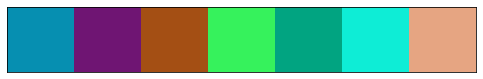

In [3]:
#Custom Color Palette 🎨
custom_colors = ["#068fb1","#6f1573","#a44f14","#36f25c","#01a481", "#0eedd6", "#e6a582"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.style.use('ggplot')

set_seed(42)
PATH = 'drive/MyDrive/Kaggle/Clustering_072022/'
data = pd.read_csv(PATH+'src/data.csv', index_col='id')

cat_feats = data.columns[data.dtypes=='int']
num_feats = data.columns[data.dtypes=='float']

In [4]:
bgm = BayesianGaussianMixture(
    n_components=7,
    covariance_type='full',
    max_iter=500,
    n_init=3)
data['prediction'] = bgm.fit_predict(StandardScaler().fit_transform(data))

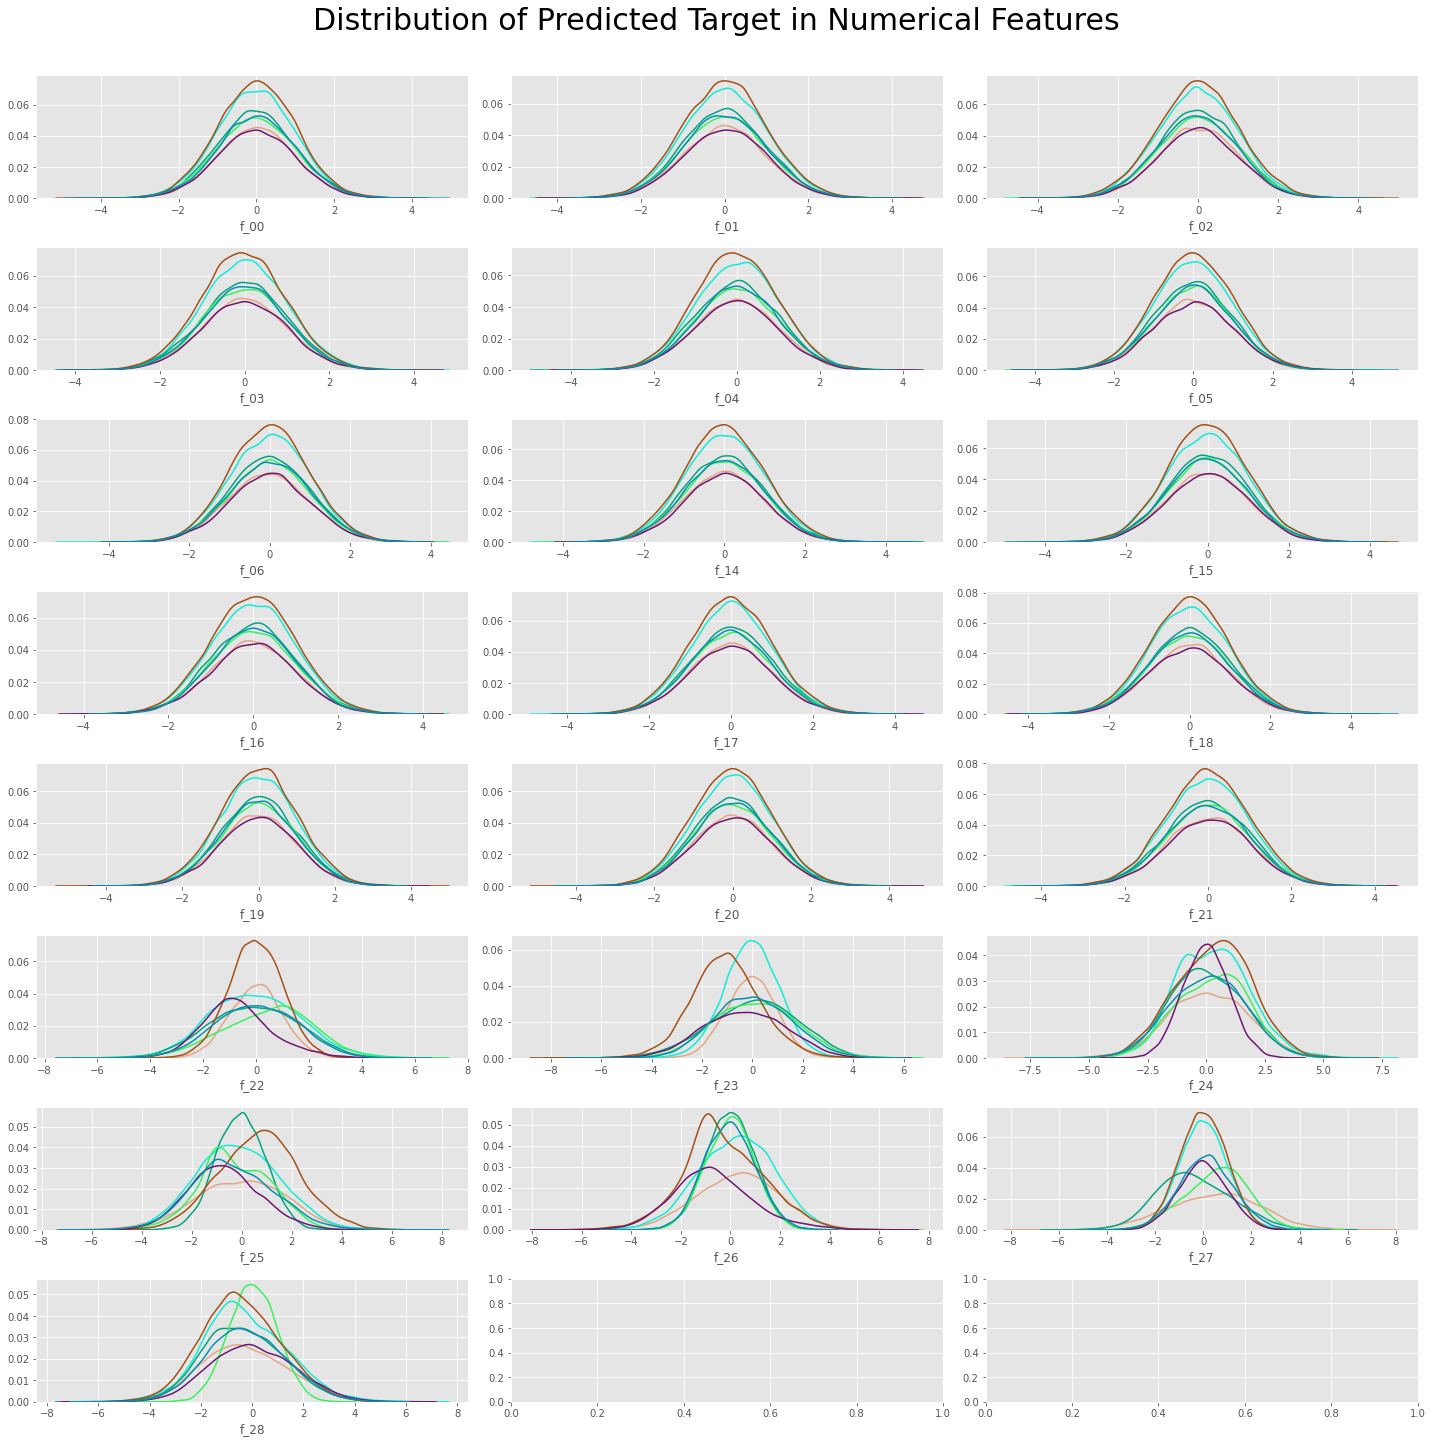

In [5]:
fig, axs = plt.subplots(8, 3, figsize=(20, 20))
for i, ax in enumerate(axs.reshape(-1)):
    if i < len(num_feats):
        sns.kdeplot(x=num_feats[i], hue='prediction', data=data, fill=False, ax=ax, legend=False, palette=custom_colors)
        ax.xaxis.get_label()
        ax.set_ylabel('')

fig.suptitle(f'Distribution of Predicted Target in Numerical Features', fontsize=30, x=0.5, y=1)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- We can see that only features 22+ have any variance in thier target distribution. The others it does not matter what the value is, the determining factor of which target is predicted is based on the target's frequency. Since these columns do not provide any information in distinguishing the target, it should be safe, if not beneficial, to remove them.

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
for i, ax in enumerate(axs.reshape(-1)):
    if i < len(cat_feats):
        sns.kdeplot(x=cat_feats[i], hue='prediction', data=data, fill=False, ax=ax, legend=False, palette=custom_colors, bw_adjust=3, cut=0)
        ax.xaxis.get_label()
        ax.set_ylabel('')

fig.suptitle(f'Distribution of Predicted Target in Categorical Features', fontsize=30, x=0.5, y=1)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- The categorical features are much more important in seperating the target. The distribution appears to be poisson. This may be an artifact from the original data as it also appeared to be poinson as well. I have not encountered this problem before but I can think of two ways to proceed.
 1. Proceed as normal by dropping the useless columns and test out different models.
 2. Drop the usesless columns and seperate the floats and ints and model them seperately via ensemble models. Then establish the most and least confident predictions, hopefully each group will be better predicting some of the targets so we can combine both predictions to create a final model, replacing one models least confident predictions with the others higher confident ones. This may prove to be very difficult as nearly all machine learning tools are based on the assumption of gaussian distribution.
